Overlay of the MERSFISH Transcripts and the Auxiliary stain transcripts to see, that everything worked as expected.... hopefully

In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [2]:
# load Merfish transcripts
# I use ploar because it is a LOT faster
%time merfish = pl.read_csv("../MERLIN_output/detected_transcripts.csv")

CPU times: user 11.2 s, sys: 2.37 s, total: 13.5 s
Wall time: 4.34 s


In [3]:
stains = ['Fabp2',
    'Fabp1',
    'mt-Nd4l',
    'Lyz1',
    'B2m']

In [4]:
merfish.shape[0]

16296388

Make an overlay plot with all stains

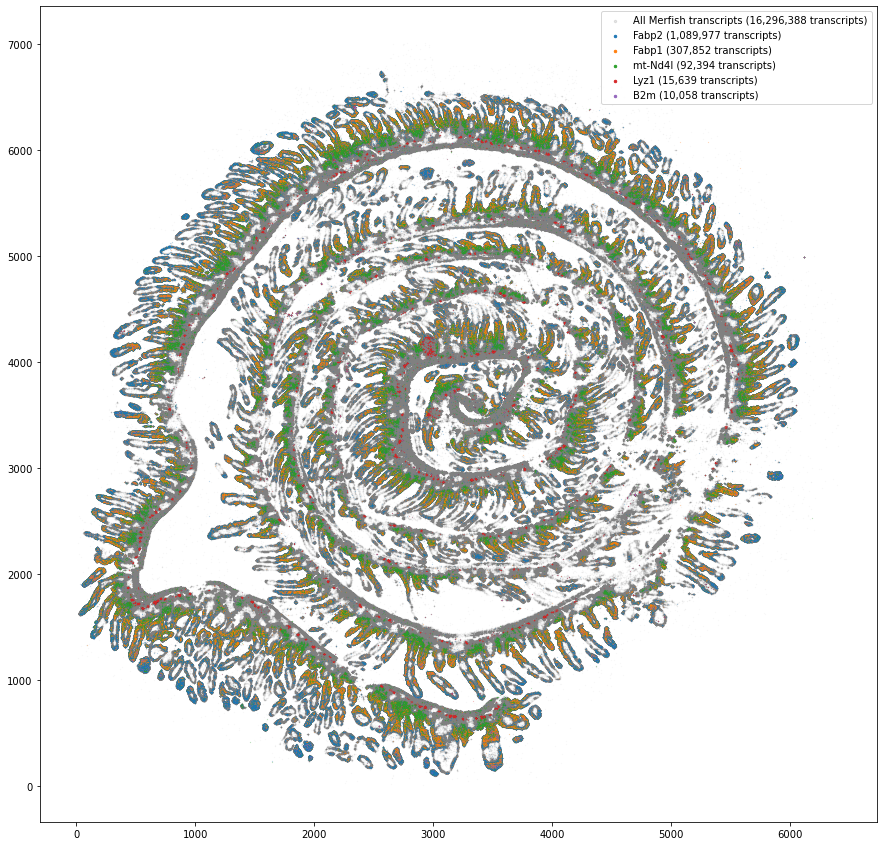

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(merfish['global_x'], merfish['global_y'], s=0.01, c='gray', alpha=.2, label=f"All Merfish transcripts ({merfish.shape[0]:,} transcripts)")

for gene in stains:
    auxiliary = pl.read_csv(f"{gene}.csv")
    ax.scatter(auxiliary['global_x'], auxiliary['global_y'], s=0.01, label=f"{gene} ({auxiliary.shape[0]:,} transcripts)") 
#make points in legend bigger....
lgnd = ax.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([6.0])
fig.show()

Make individual plots for each stain

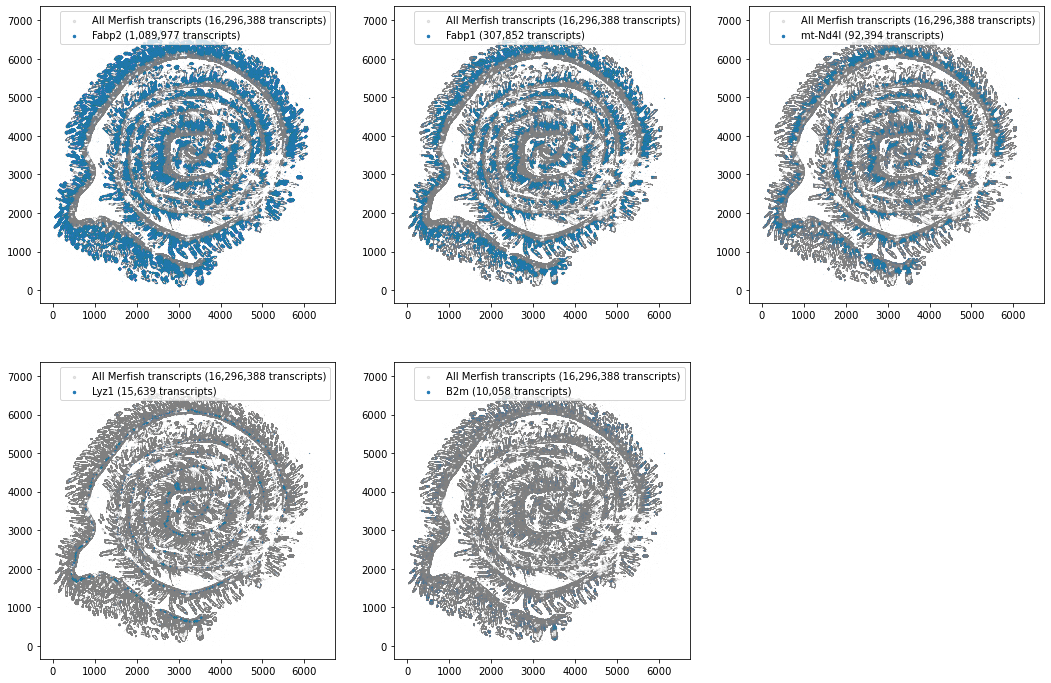

In [6]:
fig=plt.figure(figsize=(18,12))

for (i, gene) in enumerate(stains):
    ax = fig.add_subplot(2, 3, i+1)
    ax.scatter(merfish['global_x'], merfish['global_y'], s=0.001, c='gray', alpha=.2, label=f"All Merfish transcripts ({merfish.shape[0]:,} transcripts)")
    auxiliary = pl.read_csv(f"{gene}.csv")
    ax.scatter(auxiliary['global_x'], auxiliary['global_y'], s=0.001, label=f"{gene} ({auxiliary.shape[0]:,} transcripts)") 
    lgnd = ax.legend(loc="upper right", scatterpoints=1, fontsize=10)
    for handle in lgnd.legendHandles:
        handle.set_sizes([6.0])
fig.show()